# Performing Kmeans Clustering on Email Data

The text has been tokenized an preprocessed using functions from the NLPCode.py script.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from os import path
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]
print(os.getcwd())

c:\Users\faria\Documents\Graduate School Files\Winter2021\inf2011\TDW PRES


In [2]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv(r"C:\Users\faria\Documents\Graduate School Files\Winter2021\inf2011\TDW PRES\thread10body.csv")

the following list of words was used to subset the larger enron email dataset to extract emails only containing scheduling related to emails from Vince Kaminski who was a research scientist at Enron. a threshold of 3 was set; if an email contained 3 or more of these words, it was deemed to be a part of a scheduling activity.

{"schedul", "meet", "conference",  "appointment", "plan", "time",  "book",  "day", "week",  "remind", "call", "avail", "see" ,"soon", "confirm", "work", "invit", "tomorrow", "today", "evening", "morning", "afternoon" }

Through 

In [4]:
df

,ThreadID,EmailBody,CleanBody,CleanBody2
0,10,Ashley.\r\r\r\n\r\r\r\nFYI. What about Oct 16?...,"['what', 'about', 'forwarded', 'by', 'on', 'on...","['forwarded', 'cc']"
1,10,: Re: Hello from Vince Kaminski at Enron\r\r\r...,"['from', 'at', 'i', 'sent', 'you', 'a', 'reply...","['sent', 'reply', 'earlier', 'month', 'have', ..."
2,10,: Re: Hello from Vince Kaminski at Enron\r\r\r...,"['from', 'at', 'our', 'seminars', 'are', 'to',...","['are', 'works', 'please', 'send', 'title', 'a..."
3,10,: Re: Hello from Vince Kaminski at Enron\r\r\r...,"['from', 'at', 'that', 'will', 'be', 'a', 'gre...","['will', 'be', 'great', 'talk', 'email', 'oren..."
4,10,: Re: Hello from Vince Kaminski at Enron\r\r\r...,"['from', 'at', 'the', 'date', 'of', 'our', 'tr...","['date', 'trip', 'has', 'been', 'set', 'will',..."
5,10,"Ashley,\r\r\r\n\r\r\r\nI agree with you. Two t...","['i', 'agree', 'with', 'you', 'trips', 'are', ...","['agree', 'are', 'best', 'solution', 'course',..."
6,10,: Re: Hello from Vince Kaminski at Enron \r\r...,"['from', 'at', 'the', 'that', 'i', 'have', 'sc...","['have', 'scheduled', 'diningmeeting', 'room',..."
7,10,: Re: Hello from Vince Kaminski at Enron \r\r...,"['from', 'at', ""'s"", 'see', 'if', 'we', 'can',...","['see', 'can', 'rearrange', 'seminar', 'change..."
8,10,: Re: Hello from Vince Kaminski at Enron\r\r\r...,"['from', 'at', 'i', 'spoke', 'too', 'soon', 'a...","['spoke', 'too', 'soon', 'apparently', 'semina..."
9,10,"Shmuel,\r\r\r\n\r\r\r\nThanks for the message....","['for', 'the', 'message', 'i', 'am', 'working'...","['message', 'am', 'working', 'recruiter', 'fin..."


'CleanBody2' column contains the chunking of specific POS tags.
- patternV3 = 'VP: {<VB.?>*<MD.?>*<NN>*<JJ.?>*<RB.?>*}' #all forms of verbs, nouns, adjectives and adverbs

In [5]:
for a in range(len(df)):
    print("email", a)
    print(df['CleanBody2'][a])

email 0
['forwarded', 'cc']
email 1
['sent', 'reply', 'earlier', 'month', 'have', "n't", 'heard', 'date', 'department', 'has', 'can', 'schedule', 'visit', 'would', 'like', 'invite', 'give', 'seminar', 'will', 'be', 'attended', 'many', 'graduate', 'faculty', 'will', 'give', 'opportunity', 'tell', 'program', 'sufficient', 'leadtime', 'can', 'advertise', 'seminar', 'school', 'financial', 'engineering', 'email', 'oren', 'phone', 'original', 'message']
email 2
['are', 'works', 'please', 'send', 'title', 'abstract', 'email', 'oren', 'phone', 'original', 'message']
email 3
['will', 'be', 'great', 'talk', 'email', 'oren', 'phone', 'original', 'message', 'pm']
email 4
['date', 'trip', 'has', 'been', 'set', 'will', 'be', 'shall', 'be', 'glad', 'make', 'presentation', 'energy', 'development', 'valuation', 'role', 'developing', 'forward', 'natural', 'gas', 'electricity', 'let', 'know', 'topic', 'would', 'be', 'interest', 'is', 'case', 'shall', 'follow', 'title', 'abstract', 'way', 'are', 'free', '

In [6]:
# the vectorizer takes tokenized text as input
# try with and without stop words 
#result in more garbage words, if stopwords not taken out
vectorizer = TfidfVectorizer(stop_words='english')
X=vectorizer.fit_transform(df['CleanBody2'][:])



## Hyperparameter choice for Kmeans

a true k of 4 was chosen according to the elbow curve estimates

'kmeans++' was chosen to converge at result faster (according to sklearn documentation) 

max_iter of 500 was chosen to in an attempt to achieve the best clustering of words. The default is 300

n_init of 20 was chosen for the same reasons and the default here for this is 10

In [9]:
distortions = []
K = range(1,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

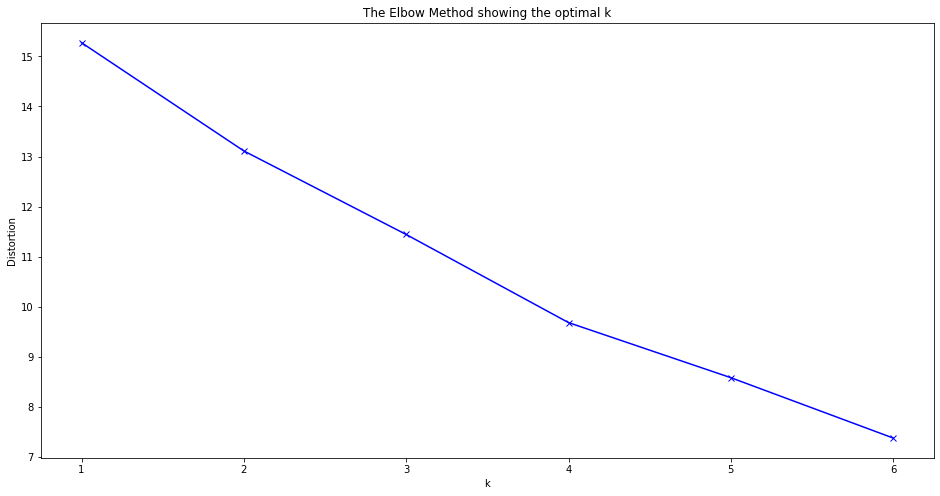

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [11]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=500, n_init=20)
model.fit(X)

KMeans(max_iter=500, n_clusters=4, n_init=20)

In [12]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: shall
 date
 trip
 developing
 role
 energy
 development
 gas
 electricity
 valuation
Cluster 1: campus
 change
 room
 visit
 coordinator
 got
 morning
 efficient
 rearrange
 faculty
Cluster 2: email
 original
 oren
 phone
 message
 talk
 week
 title
 pm
 send
Cluster 3: cc
 getting
 day
 forwarded
 open
 earlier
 make
 presentation
 agree
 solution


# Conclusion:

TFIDF is not a good way to understand business processes because it depends on the frequency of the words used in the email, not necessarily how they are used.

Kmeans only builds off of TFIDF and therefore is not particularly helpful in providing meaningful word clusters for my purpose

Junk words like 'oren' (which is the name of a person) and 'cc' which is a field from the email metadata (b/c of nested raw string email threads in the body) did not get filtered out through chunking of POS tags